<a href="https://colab.research.google.com/github/GreggHeller1/Neuron_Tutorial/blob/main/scripts/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# settings
%load_ext autoreload
%autoreload 2
try:
    import google.colab

    in_colab = True
except:
    in_colab = False
print(in_colab)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
False


In [2]:
# installs (for colab only, run this once)
if in_colab:
    ! git clone https://github.com/GreggHeller1/PMT_linearization.git

In [45]:
# local imports
# cwd if in colab for imports to work
if in_colab:
    %cd /content/PMT_linearization

from src import data_io as io
from src import plotting
from src import computation as comp
from src import main
from datetime import datetime


In [4]:
# imports
from matplotlib import pyplot as plt
import os
import numpy as np

In [13]:
# define paths
# cwd if in colab for file loading to work
if in_colab:
    %cd /content/PMT_linearization/scripts

test_path = os.path.join("demo_data", "test.txt")
print(test_path)
print(os.getcwd())
os.path.exists(test_path)

demo_data/test.txt
/Users/Gregg/code/PMT_linearization


False

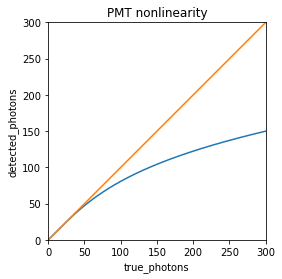

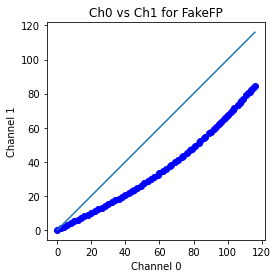

In [7]:
fp = "FakeFP"
x = np.arange(0, 350)
x, y = comp.fake_pmt_n(x)
fig, ax = plotting.plot_pmt_nonlinearity(x, y)


fake_ratio = 2.0
fake_true_photons, fake_green_channel = comp.fake_pmt_n(np.arange(0, 140, fake_ratio))

fake_x2, fake_red_channel = comp.fake_pmt_n(fake_true_photons / fake_ratio, round=False)
channel_i = 0
channel_j = 1
fig, ax, title = plotting.plot_channels(
    fake_green_channel, fake_red_channel, channel_i, channel_j, alpha=1, label=fp
)
io.savefig(fig, title)

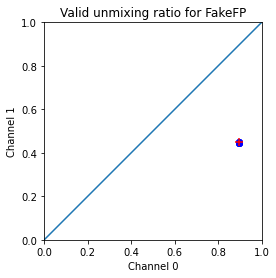

1.9974176203716936
[0.8944271909999159, 0.8944271909999159, 0.8944173755046528, 0.8943388437914351, 0.8941817390824464, 0.8939459790846706, 0.8936314410381386] [0.4472135954999579, 0.4472135954999579, 0.4472332259519287, 0.44739024630159197, 0.44770416291507936, 0.4481747276212145, 0.4488015681658208]


In [8]:
# data manipulation

xs, ys, xs_per_y = comp.get_unmixing_ratio(fake_green_channel, fake_red_channel)
fig, ax, title = plotting.plot_unmixing_vectors(
    xs, ys, channel_i, channel_j, label=fp, plot=True
)
io.savefig(fig, title)
print(xs_per_y)
print(xs, ys)

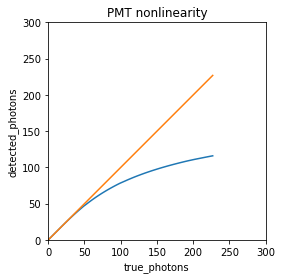

In [9]:
detected_photons, true_photons = comp.compute_PMT_nonlinearity(
    fake_green_channel, fake_red_channel, xs_per_y
)
io.save_PMT_curve(detected_photons, true_photons, i=channel_i, j=channel_j, fp=fp)


# Plot the inferred nonlinearity and see if it matches
fig, ax = plotting.plot_pmt_nonlinearity(true_photons, detected_photons)
io.savefig(fig, f"PMT curve from {fp} on {channel_i}{channel_j}")

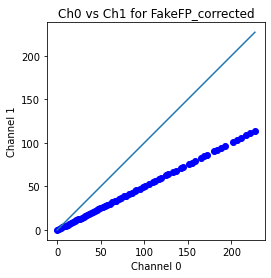

In [10]:
# use the inferred nonlinearity to correct both channels then plot. The result should be linear
corrected_green = []
corrected_red = []

for g, r in zip(fake_green_channel, fake_red_channel):
    try:
        corrected_green.append(
            comp.correct_PMT_nonlinearity(g, detected_photons, true_photons)
        )
        corrected_red.append(
            comp.correct_PMT_nonlinearity(r, detected_photons, true_photons)
        )
    except Exception as E:
        print(g, r)

fig, ax, title = plotting.plot_channels(
    corrected_green,
    corrected_red,
    channel_i,
    channel_j,
    alpha=1,
    label=f"{fp}_corrected",
)
io.savefig(fig, title)

In [14]:
# Now lets do it with an image of actual flourophores

filename = (
    "TDTfp_only.tif"  # "TFP_10us_dwell_915nm_Z_STACK.tiff"#"YFP_10us__STACK.tiff"#
)
filepath = os.path.join("scripts",""demo_data", filename)
os.path.exists(filepath)


im = io.imread(filepath)
fp = comp.fp_from_tiffname(filename)

for i in range(im.shape[3]):
    for j in range(im.shape[3]):
        if not (i == j):
            try:
                main.main(
                    fp,
                    i,
                    j,
                    im[:, :, :, i].flatten(),
                    im[:, :, :, j].flatten(),
                    alpha=0.01,
                )
            except Exception as E:
                pass

SyntaxError: invalid syntax (361470753.py, line 6)

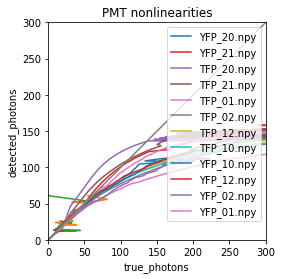

In [15]:
curve_dict = io.load_PMT_curves()
fig, ax = plotting.plot_PMT_curves(curve_dict)
io.savefig(fig, f"PMT_nonlinearities from {fp}")

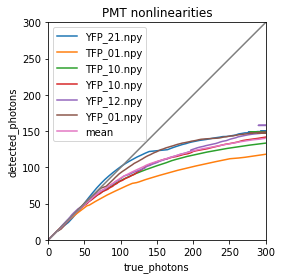

In [48]:
# use 0,1 YFP, 12, YFP, 01 TFP Only
valid_curves = io.load_valid_curve_json()

valid_curves["YFP_01.npy"] = True
valid_curves["YFP_01.npy"] = True
valid_curves["TFP_01.npy"] = True
valid_curves["TFP_10.npy"] = True
valid_curves["YFP_12.npy"] = True
valid_curves["YFP_21.npy"] = True


to_plot = {}
for key, value in valid_curves.items():
    if value:
        to_plot[key] = curve_dict[key]
mean_curve = comp.get_average_curve(to_plot)
to_plot['mean'] = mean_curve

fig, ax = plotting.plot_PMT_curves(to_plot)

io.save_valid_curve_json(current_valid_dict=valid_curves, all_curves=curve_dict)
#io.save_mean_PMT_curve(mean_curve['counts'], mean_curve['corrections'])



In [40]:

a = np.array([0,1,2,3,4])
np.searchsorted(a, .5)



1

In [33]:

#main.main("FakeFP", 4, 6, fake_red_channel, fake_green_channel, alpha=1)

a = np.array((1, 2, 3, 4))
b = np.array((1, 3, 6, 7))

x = 2.3
idx = np.searchsorted(a, x) - 1

3.8999999999999995


In [17]:
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(comp.smooth(y, 1))

[ 1  2  3  3  5  6  7  8  9 10]


In [128]:
funclist = [lambda x: x, lambda x: x**2]
x = np.array([1, 2, 3, 4, 5])
np.piecewise(x, [x < 3, x >= 3], funclist)

array([ 1,  2,  9, 16, 25])

In [137]:
np.searchsorted(x, y) - 1

array([-1,  0,  1,  2,  3,  4,  4,  4,  4,  4])

In [25]:
y[np.logical_and(y > 3, y < 7)]

array([4, 5, 6])

here
(15, 400, 400, 3)
[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
<class 'numpy.uint16'>


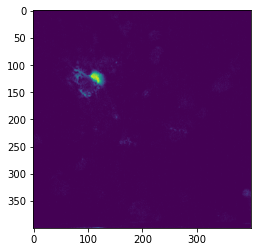

In [133]:

path = "/Users/Gregg/Dropbox (MIT)/Files for Gregg/FromJoe/4color_testing/unmixingcoeffs/YFP_915/10us_dwell_915nm/YFP_10us__STACK_OG.tiff"
im_1 = io.imread(path)
print(im_1.shape)
plt.imshow(im_1[6, :, :, 1])
print(im_1[6, :, :, 2])
print(type(im_1[0,0,0,0]))


there
(15, 400, 400, 3)
[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
<class 'numpy.int16'>


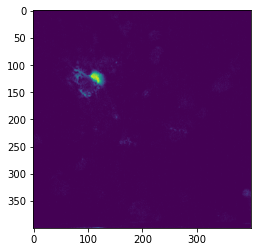

In [134]:
path_ = "/Users/Gregg/Dropbox (MIT)/Files for Gregg/FromJoe/4color_testing/unmixingcoeffs/YFP_915/10us_dwell_915nm"  #"/Users/Gregg/Dropbox (MIT)/Files for Gregg/FromJoe/4color_testing/unmixingcoeffs/tdTomato_invivo_run2_10usdwell_915nm_700mWbeforeobject/rawtif/run2_10usdwell_915nm_700mWbeforeobject__STACK.tiff"


im = io.imread(path_)
print(im.shape)

name = 'test_save.tiff'
save_path = os.path.join(os.path.split(path)[0], name)
print(im[6, :, :, 2])


io.write_4d_tiff(im, save_path)
plt.imshow(im[6, :, :, 1])


print(type(im[0,0,0,0]))



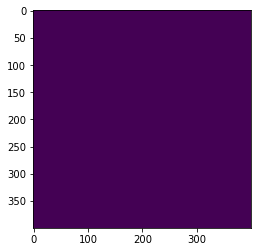

In [132]:
plt.imshow(im[6, :, :, 1]==im_1[6, :, :, 1])


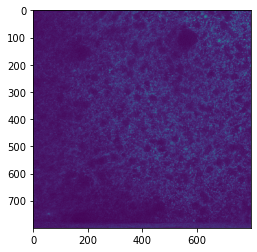

In [140]:
plt.imshow(cropped[:, :, 2])

In [141]:
from mpl_toolkits.mplot3d import Axes3D

(10000, 3)


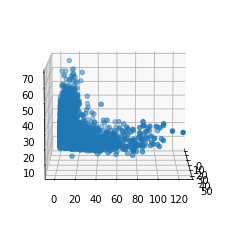

In [155]:
valid_mask = cropped[:, :, 2] > 4
cropped_nonzero = cropped[valid_mask, :]
a = np.arange(0, cropped_nonzero.shape[0], 1)
subsample = np.random.choice(a, 10000)
subsampled = cropped_nonzero[subsample, :]
print(subsampled.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(cropped_nonzero[:, 0], cropped_nonzero[:, 1], cropped_nonzero[:, 2])
ax.view_init(elev=10.0, azim=0)

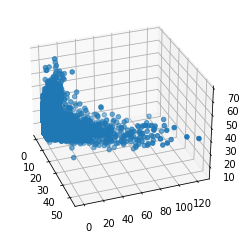

In [158]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(cropped_nonzero[:, 0], cropped_nonzero[:, 1], cropped_nonzero[:, 2])
ax.view_init(elev=30.0, azim=-20)

In [173]:
mask = cropped[:, :, 2] < 4 * cropped[:, :, 0]
cropped[mask] = 0

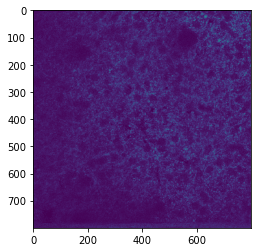

In [179]:
plt.imshow(cropped[:, :, 2])

(10000, 3)


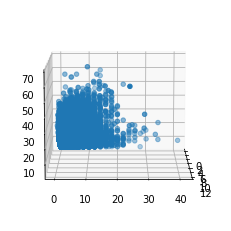

In [178]:
valid_mask = cropped[:, :, 2] > 4
cropped_nonzero = cropped[valid_mask, :]
a = np.arange(0, cropped_nonzero.shape[0], 1)
subsample = np.random.choice(a, 10000)
subsampled = cropped_nonzero[subsample, :]
print(subsampled.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(cropped_nonzero[:, 0], cropped_nonzero[:, 1], cropped_nonzero[:, 2])
ax.view_init(elev=10.0, azim=0)

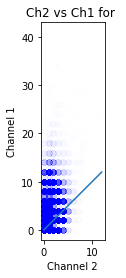

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Ch2 vs Ch1 for '}, xlabel='Channel 2', ylabel='Channel 1'>,
 'Ch2 vs Ch1 for ')

In [194]:
plotting.plot_channels(cropped[:, :, 0], cropped[:, :, 1], 2, 1, alpha=0.002)